# Tech Fundamentals of Business Analytics
"I pledge under the RPI honor code that I have completed this work on my own." 

Emma Prescott

## Exploratory Data Analysis
(30 minute estimate)

The data directory includes a wide variety of data related to health care.  
    
(1. 10 points) Pick a numeric variable from the data which seems interesting.  Analyze the mean of that variable for both MA and NY.  


(1a. 5 points)   Provide the code to perform the operations above. 


(1b. 5 points)  Provide an interpretation of your findings.  What does what you found in 1a mean?  If you couldn't get 1a to work then you can interpret it both ways. 


In [16]:
import pandas as pd

medications_ma = pd.read_csv('data/ma/medications.csv')
medications_ny = pd.read_csv('data/ny/medications.csv')

medications_ma.describe() #Mean Cost: 492.94
medications_ny.describe() #Mean Cost: 529.96

ma_med_mean = medications_ma['COST'].mean()
print('Mean Cost of medications in MA:', ma_med_mean)

ny_med_mean = medications_ny['COST'].mean()
print('Mean Cost of medications in NY:', ny_med_mean)

Mean Cost of medications in MA: 492.94318506153525
Mean Cost of medications in NY: 529.9636547624685


1b. I was curious if there was a difference in the average cost of medications in Massachusetts and New York. From examining the medications.csv files from both states, I'm able to see the average cost of medication in NY is higher than the average cost in MA. This difference could occur for a number of reasons, significantly more people in NY require more of the relatively expensive types of medications than those in MA or the actual prices of the same medication could differ by states.

## Visualization
(30 minute estimate)

The `encounters.csv` dataframe has the `COST` variable, which is a real concern when it comes to hospitals, lawmakers, etc. 

(2. 10 points) Create a graph of the `COST` on one axis and the `ENCOUNTERCLASS`  on a second axis for both NY and MA (can do in different graphs). 

(2a. 5 points)   Provide the code to perform the operations above. 

(2b. 5 points)  Provide an interpretation of your findings.  What does what you found in 2a mean?  If you couldn't get 2a to work what is the data likely to show. 




AxesSubplot(0.125,0.125;0.775x0.755)


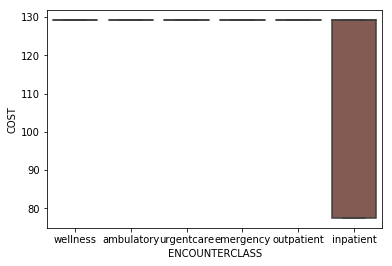

In [78]:
import seaborn as sns
import numpy as np

encounters_ma = pd.read_csv('data/ma/encounters.csv')
encounters_ny = pd.read_csv('data/ny/encounters.csv')

full_encounter['EncounterClass_ma'] = encounters_ma['ENCOUNTERCLASS']
full_encounter['Cost_ma']= encounters_ma['COST']

# full_encounter.head()
ma_plot = sns.boxplot(x=EncounterClass_ma, y=cost_ma)
print(ma_plot)

AxesSubplot(0.125,0.125;0.775x0.755)


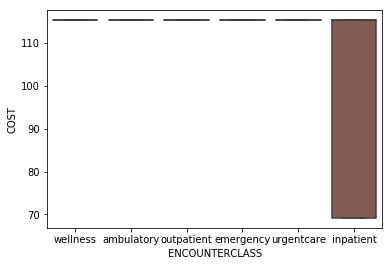

In [71]:
EncounterClass_ny = encounters_ny['ENCOUNTERCLASS']
cost_ny = encounters_ny['COST']

ny_plot = sns.boxplot(x=EncounterClass_ny, y=cost_ny)
print(ny_plot)

2b. By looking at the two graphs above, we're able to see the cost of encounters appears to be slightly higher in Massachusetts than encounters in New York (ie. closer to 130 vs. under 120).

## Join
(30 minute estimate)

The `encounters.csv` dataframe has the `Patient` variable, which is a foreign key to the `patients.csv`   

(3. 5 points) Join the `encounters.csv` data with the `patient.csv` data into a new pandas dataframe and list the first several rows of the dataframe. 

*You need only do this for MA data*

(3a. 5 points)   Provide the code to perform the operations above. 



In [46]:
patients_ma = pd.read_csv('data/ma/patients.csv')
#patients_ma.head() #foreign key column is named "ID"

encounters_patients = encounters_ma.join(patients_ma.set_index('ID'), on= 'PATIENT')
encounters_patients.head()

,ID,START,STOP,PATIENT,ENCOUNTERCLASS,CODE,DESCRIPTION,COST,REASONCODE,REASONDESCRIPTION,...,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,ZIP
0,31c87413-3974-473c-9754-c7114b8978f6,2009-01-25T13:47:49Z,2009-01-25T14:17:49Z,628a3ea6-cfb4-4e7d-8e6b-a5f62c6e8883,wellness,185349003,Encounter for check up (procedure),129.16,NaN,NaN,...,Volkman526,M,asian,chinese,F,Cambridge,897 Sporer Landing,New Bedford,Massachusetts,2740.0
1,6c9857c1-7ceb-4963-b5fb-7e49042c2070,2011-10-04T06:18:31Z,2011-10-04T06:33:31Z,be6fcf98-1120-4e61-8c47-053a90dbb0fb,wellness,185349003,Encounter for check up (procedure),129.16,NaN,NaN,...,NaN,NaN,white,english,M,Bedford,392 Cronin Center,Brockton,Massachusetts,2301.0
2,010bec07-df11-4d85-9601-8553997346d2,2010-10-03T22:27:10Z,2010-10-03T22:42:10Z,7a463c11-6f37-4ace-a7e9-4ddb1f991ab8,wellness,185349003,Encounter for check up (procedure),129.16,NaN,NaN,...,NaN,NaN,hispanic,puerto_rican,F,Needham,967 Bashirian Mission Unit 30,Revere,Massachusetts,2151.0
3,ef25c90c-535a-460d-bc7d-fa0b3a7cf772,2009-08-23T06:24:25Z,2009-08-23T06:49:25Z,09e253b4-5aaa-42a0-8f4f-a521ac0254b5,ambulatory,185345009,Encounter for symptom,129.16,10509002.0,Acute bronchitis (disorder),...,NaN,S,hispanic,central_american,M,Brookline,779 Trantow Road,Boston,Massachusetts,2108.0
4,4c72baa9-14bc-4ca8-a833-c8244603744c,2009-09-17T20:18:22Z,2009-09-17T20:48:22Z,0ab6aa30-dfd4-4955-93b5-f05c9613bc70,wellness,185349003,Encounter for check up (procedure),129.16,NaN,NaN,...,NaN,NaN,white,scottish,F,Chicopee,341 Collins Junction,Dedham,Massachusetts,2026.0


## Regression
(45 minute estimate) 

(4. 15 points) First split your data into an 70% train and 30% validation.  Using linear regression analysis, use the `ENCOUNTERCLASS` to predict `COST` This is your naive model. Report R-Squared for both training and validation. 

*You need only do this for MA data*

(4a. 5 points)  Breifly describe how your would do the task above.   

(4b. 5 points)   Provide the code to perform the operations above. 

(4c. 5 points)  Provide an interpretation of your findings.  What does what you found in 4a mean?  If you couldn't get 2a to work what is the data likely to show. 


4a. To complete the task above:
1. Make EncounterClass into numeric variables since they're categorical (ie. wellness, ambulatory, outpatient, emergency, urgentcare, inpatient). I will use the get_dummy feature to convert each encounter class in its own column and include binomial variables for when they're identified. 
2. I need to import the necessary packages to properly split the data into the training and test datasets.
3. I need to also import the necessary package to run a Linear Regression model. Followed by properly setting up the model - fitting the data, generating the predictions, finally calculating the R-squared values to evaluate the performance of my model

In [49]:
naive = pd.get_dummies(encounters_ma[['ENCOUNTERCLASS']])
# train.head()
prediction = encounters_ma['COST']

#Step 1
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(naive, prediction, train_size =0.7, test_size=0.3, random_state=100)

#Step 2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Step 3
lr = LinearRegression()
lr.fit(train_x, train_y) #fit data

pred_x = lr.predict(train_x) #generate predictions
pred_y = lr.predict(test_x)

R2_train = r2_score(train_y, pred_x) #calculate r-squared
R2_test = r2_score(test_y, pred_y)

print('R2 Train Score:', R2_train)
print('R2 Test Score:', R2_test)

R2 Train Score: 0.4402480640848936
R2 Test Score: 0.43025317937136665


4c. As we've learned from class, R-squared is used to determine how well our model performs at making predictions. It assess the goodness-of-fit of our model against the dependent variable (ie. predicting each encounters cost). Ideally, we'd like to see a R-squared value of 1.0 returned or as close to 1.0 (100%) as possible, indicating our model's predictions are not too far from the actual values. 

But, my model return 0.43. This value isn't too high indicating the independent variable (ie. encounter class) poorly predicts the dependent variable (ie. cost). Maybe there are other independent variables that could be used to more accurately predict or influence the cost of an encounter class.

## Predictive Modeling
(45 minute estimate) 

(5. 15 points) Try and improve over your naive model.  This could include a variety of options.  You could include more data, different algorithm, etc.  *The data for cost wasn't as exciting as I hoped and you might get a really high R2 in your simple model. Try something different through or describe how you would.*

(5a. 5 points)  Describe how you would improve the modeling.

(5b. 5 points)   Provide the code to perform at least 1 improvement.  

(5c. 5 points)  Provide an interpretation of your findings.  What does what you found in 5b mean?  If you couldn't get 5b to work what is the data likely to show. 

5a. To improve my naive model, I'd like to include more data/variables to our Linear Regression model. By adding more variables, I'm hoping for a higher R2 value since the model can train off more than just one variable to make its predictions. I'll try including more information about the patient (ie. ethnicity, gender and city)

In [52]:
# encounters_patients.head()
encounters_patients.columns

Index(['ID', 'START', 'STOP', 'PATIENT', 'ENCOUNTERCLASS', 'CODE',
       'DESCRIPTION', 'COST', 'REASONCODE', 'REASONDESCRIPTION', 'BIRTHDATE',
       'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX', 'FIRST', 'LAST',
       'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER',
       'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'ZIP'],
      dtype='object')

In [61]:
attempt2 = pd.get_dummies(encounters_patients[['ENCOUNTERCLASS', 'ETHNICITY', 'GENDER', 'CITY']])
attempt2.head()

predict2 = encounters_patients['COST']

#Step 1
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(attempt2, predict2, train_size =0.7, test_size=0.3, random_state=100)

#Step 2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(train_x, train_y) #fit data

pred_x = lr.predict(train_x) #generate predictions
pred_y = lr.predict(test_x)

R2_train = r2_score(train_y, pred_x) #calculate r-squared
R2_test = r2_score(test_y, pred_y)

print('R2 Train Score:', R2_train)
print('R2 Test Score:', R2_test)

R2 Train Score: 0.4838106451262887
R2 Test Score: 0.47630935342245384


5c. By including additional independent variables (ie. encounter class, ethnicity, gender and city), the outputted R2 score was slightly higher than my naive model - 0.4838 vs. 0.4402. Maybe patient information is not as influential on the cost of an encounter class. With more time, I would have liked to examine factors outside of the encounter and patient datasets, such as the patients' careplan, medications, or possibly procedures.

### Submission
For the final submission, please both commit your code to Github and create a PDF and submit to LMS (this is where the final grading is done.)  

Please don't spend more than three hours on it. You can take up to an hour of breaks during the process. 